<a href="https://colab.research.google.com/github/MahdiZaman/Spring2019-CAP5610/blob/master/hw1p4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255 

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


In [0]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

In [0]:
from keras import models
from keras import layers

network = models.Sequential()
# network.add(layers.Flatten(input_shape=(28,28,)))
# network.add(layers.Dense(512, activation='relu', input_shape=(28,28,)))
network.add(layers.Dense(10, activation='softmax', input_shape=(28*28,)))
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [0]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [0]:
epochs = 10
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 66us/step - loss: 1.2994 - acc: 0.6948 - val_loss: 0.8127 - val_acc: 0.8332
Epoch 2/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.7185 - acc: 0.8403 - val_loss: 0.6075 - val_acc: 0.8626
Epoch 3/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.5883 - acc: 0.8595 - val_loss: 0.5259 - val_acc: 0.8738
Epoch 4/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.5260 - acc: 0.8695 - val_loss: 0.4802 - val_acc: 0.8801
Epoch 5/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.4882 - acc: 0.8750 - val_loss: 0.4501 - val_acc: 0.8858
Epoch 6/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.4622 - acc: 0.8802 - val_loss: 0.4288 - val_acc: 0.8891
Epoch 7/10
60000/60000 [==============================] - 2s 27us/step - loss: 0

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

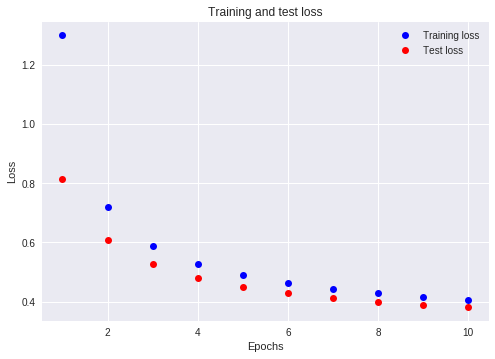

In [0]:
import matplotlib.pyplot as plt
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

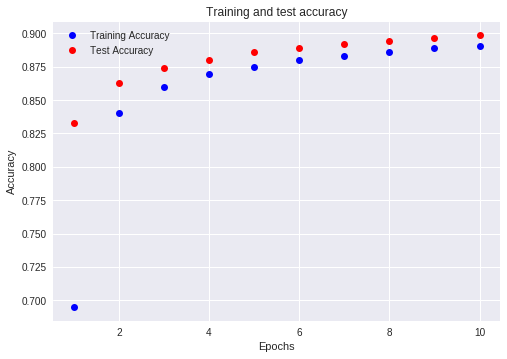

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test Accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()